In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import statsmodels.imputation.mice as mice

In [3]:
df = pd.read_csv("Dataset.csv")

### About dataset

In [4]:
df.shape

(1048575, 43)

In [4]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

In [5]:
len(df["Patient_ID"].unique())

27101

### Column Descriptions
Hour - Number of hrs under observation

*Vital signs (columns 1-8)*
1. HR - Heart rate (beats per minute)
2. O2Sat - Pulse oximetry (%)
3. Temp - Temperature (Deg C)
4. SBP - Systolic BP (mm Hg)
5. MAP - Mean arterial pressure (mm Hg)
6. DBP - Diastolic BP (mm Hg)
7. Resp - Respiration rate (breaths per minute)
8. EtCO2 - End tidal carbon dioxide (mm Hg)

*Laboratory values (columns 9-34)*
1. BaseExcess - Measure of excess bicarbonate (mmol/L)
2. HCO3 - Bicarbonate (mmol/L)
3. FiO2 - Fraction of inspired oxygen (%)
4. pH
5. PaCO2 - Partial pressure of carbon dioxide from arterial blood (mm Hg)
6. SaO2 - Oxygen saturation from arterial blood (%)
7. AST - Aspartate transaminase (IU/L)
8. BUN - Blood urea nitrogen (mg/dL)
9. Alkalinephos - Alkaline phosphatase (IU/L)
10. Calcium (mg/dL)
11. Chloride (mmol/L)
12. Creatinine (mg/dL)
13. Bilirubin_direct - Bilirubin direct (mg/dL)
14. Glucose - Serum glucose (mg/dL)
15. Lactate - Lactic acid (mg/dL)
16. Magnesium (mmol/dL)
17. Phosphate (mg/dL)
18. Potassium (mmol/L)
19. Bilirubin_total - Total bilirubin (mg/dL)
20. TroponinI - Troponin I (ng/mL)
21. Hct - Hematocrit (%)
22. Hgb - Hemoglobin (g/dL)
23. PTT - partial thromboplastin time (seconds)
24. WBC - Leukocyte count (count10^3/µL)
25. Fibrinogen (mg/dL)
26. Platelets (count10^3/µL)

*Demographics (columns 35-40)*
1. Age - Years (100 for patients 90 or above)
2. Gender - Female (0) or Male (1)
3. Unit1 - Administrative identifier for ICU unit (MICU)
4. Unit2 - Administrative identifier for ICU unit (SICU)
5. HospAdmTime - Hours between hospital admit and ICU admit
6. ICULOS - ICU length-of-stay (hours since ICU admit)

*Outcome (column 41)*
1. SepsisLabel - For sepsis patients, SepsisLabel is 1 otherwise 0

### Data Visualizations

#### Vital Signs

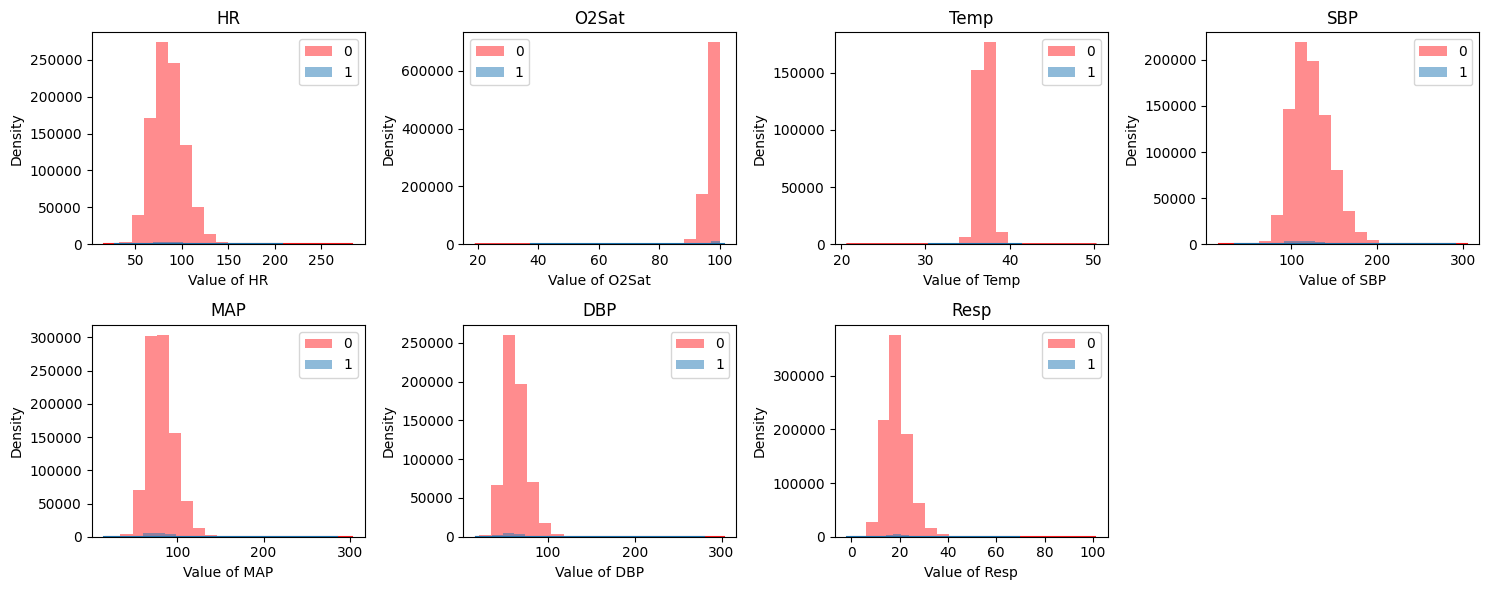

In [6]:
vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp"]

fig, axes = plt.subplots(2, 4, figsize=(15, 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

colors = cycle(['#ff1b1f', '#1f77b4'])

for i, vital in enumerate(vital_signs):
    ax = axes[i // 4, i % 4]
    for label, color in zip(df['SepsisLabel'].unique(), colors):
        data = df[df['SepsisLabel'] == label][vital]
        if label == "No":
            label = "Non-Sepsis"
        ax.hist(data, bins=20, alpha=0.5, label=label, color=color)
        sns.kdeplot(data, color=color, ax=ax)
    ax.set_title(vital)
    ax.set_xlabel(f"Value of {vital}")
    ax.set_ylabel("Density")
    ax.legend()

fig.delaxes(axes[1,3])
plt.tight_layout()
plt.show()

#### Laboratory Values

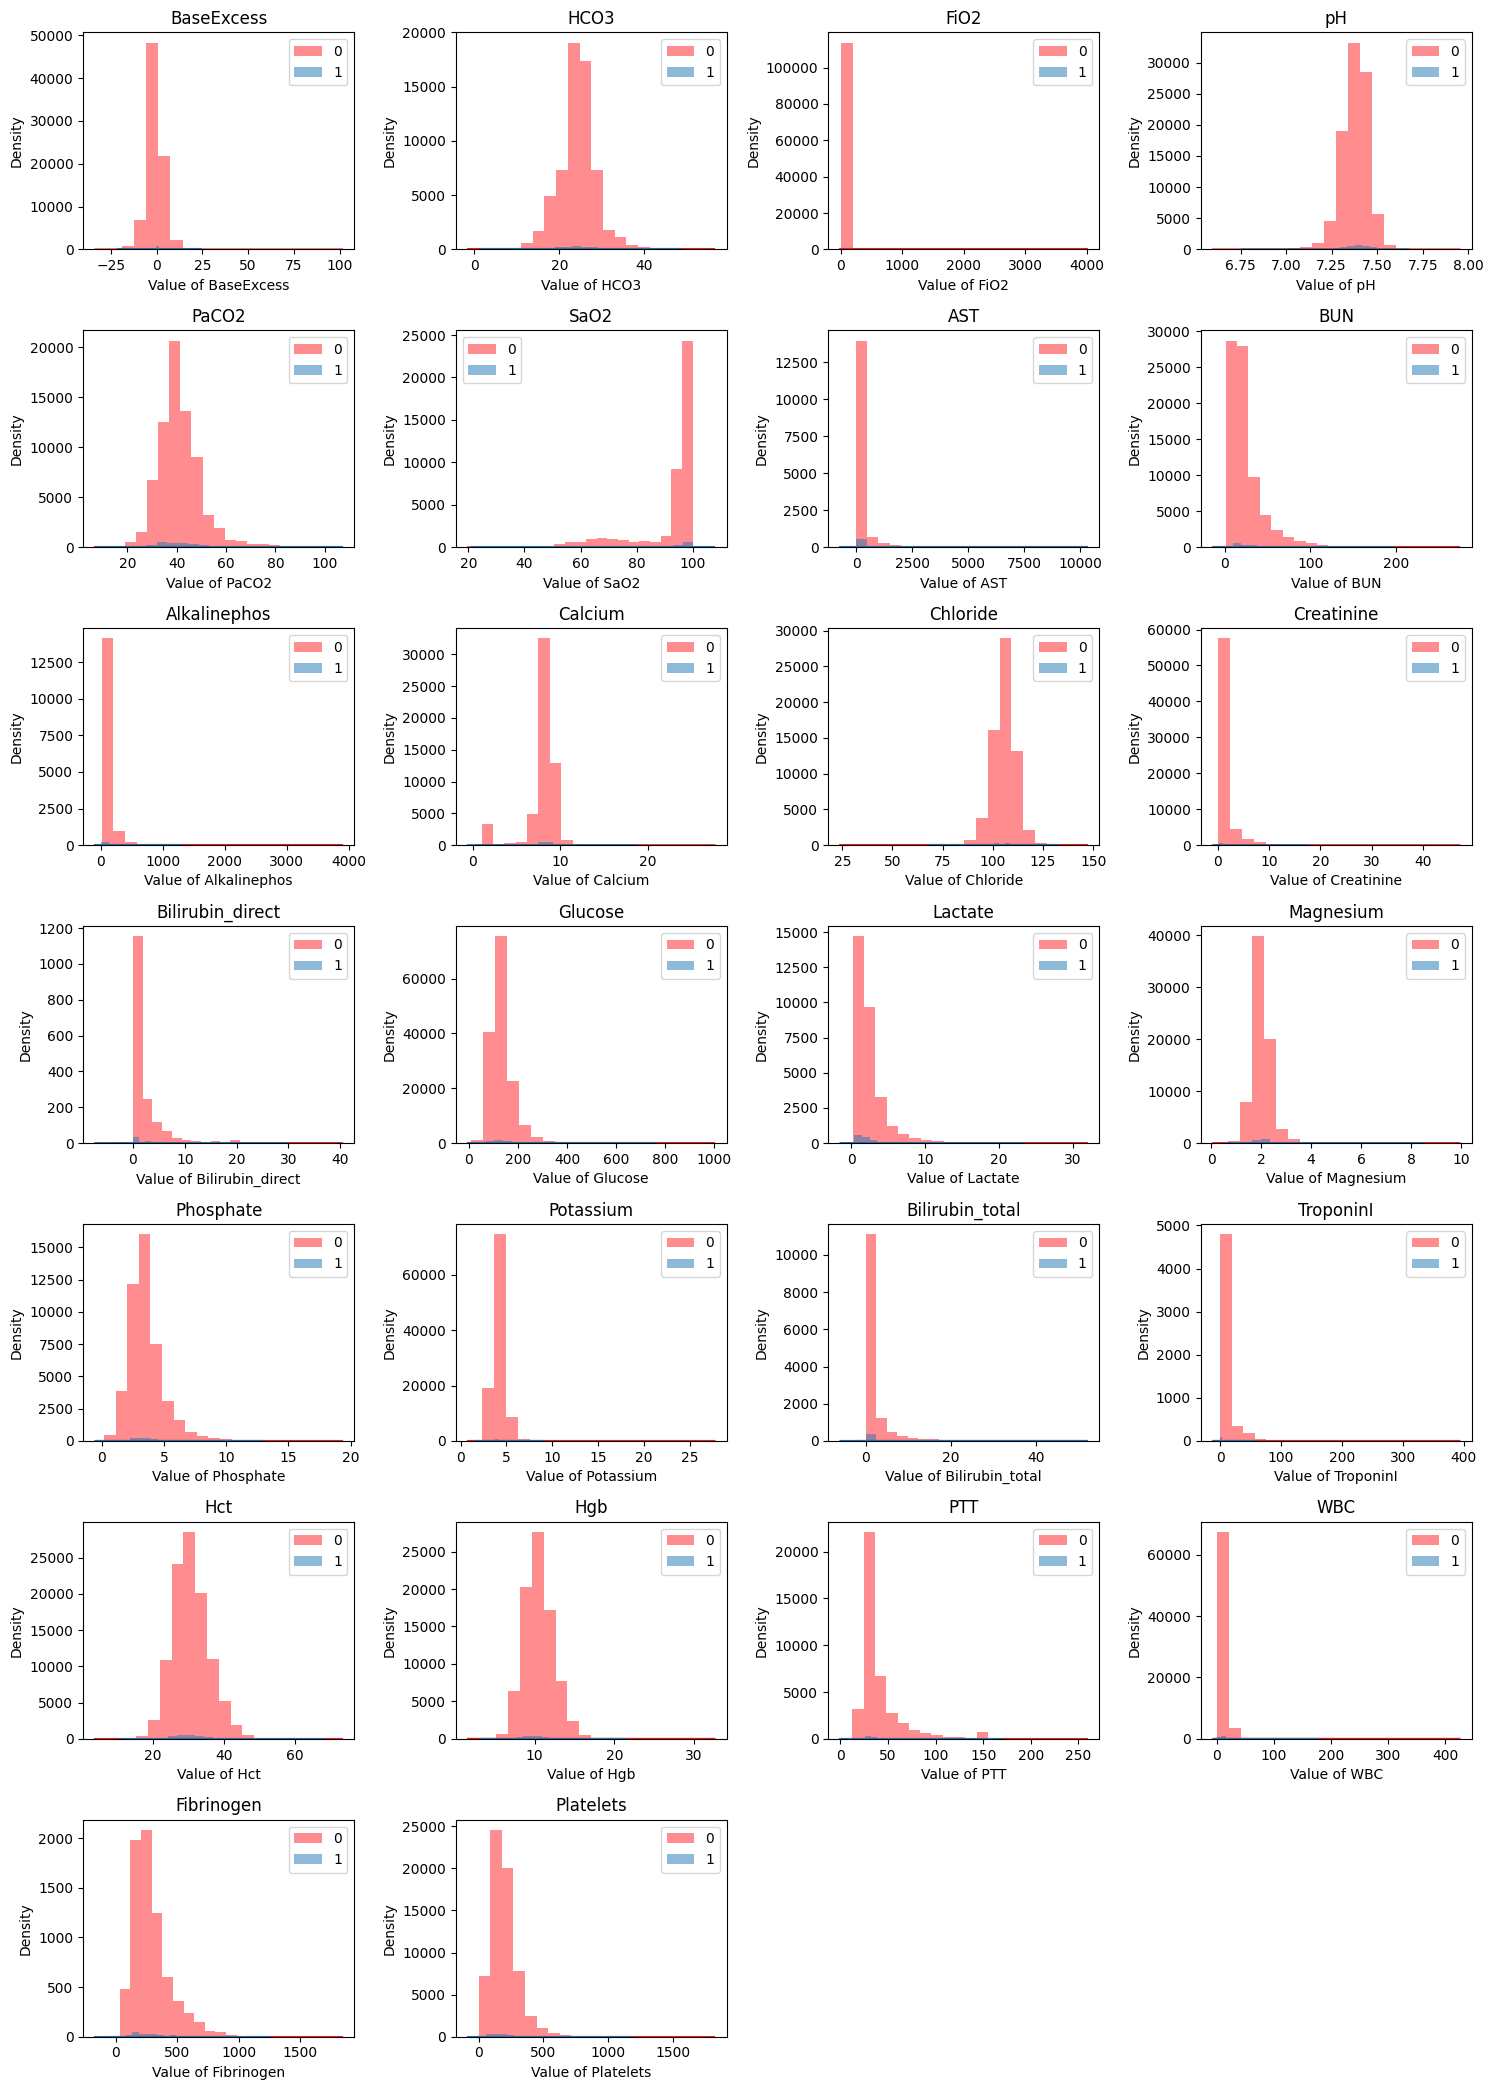

In [7]:
lab_val = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
            'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
            'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
            'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
            'Fibrinogen', 'Platelets']

fig, axes = plt.subplots(7, 4, figsize=(15, 21))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

colors = cycle(['#ff1b1f', '#1f77b4'])

for i, val in enumerate(lab_val):
    ax = axes[i // 4, i % 4]
    for label, color in zip(df['SepsisLabel'].unique(), colors):
        data = df[df['SepsisLabel'] == label][val]
        if label == "No":
            label = "Non-Sepsis"
        ax.hist(data, bins=20, alpha=0.5, label=label, color=color)
        sns.kdeplot(data, color=color, ax=ax)
    ax.set_title(val)
    ax.set_xlabel(f"Value of {val}")
    ax.set_ylabel("Density")
    ax.legend()

fig.delaxes(axes[6,2])
fig.delaxes(axes[6,3])
plt.tight_layout()
plt.show()

In [11]:
unique_df = df.drop_duplicates(subset="Patient_ID", keep="last")
unique_df = unique_df[["Patient_ID","Age", "Gender", "SepsisLabel", "Hour"]]

In [12]:
unique_df

,Patient_ID,Age,Gender,SepsisLabel,Hour
42,17072,68.54,0,0,42
58,16153,46.32,1,0,15
94,465,85.57,0,0,35
130,9891,58.18,0,0,35
176,8065,67.00,1,0,45
...,...,...,...,...,...
1048389,102220,52.00,0,0,52
1048446,110431,56.00,1,0,56
1048484,115827,69.00,0,0,37
1048518,115885,56.00,1,0,33


In [20]:
unique_df.describe()

,Patient_ID,Age,Gender,SepsisLabel,Hour
count,27101.000000,27101.000000,27101.000000,27101.000000,27101.000000
mean,35077.379100,62.159371,0.572599,0.080477,37.691377
std,43572.104286,16.340251,0.494710,0.272035,22.535706
min,1.000000,15.000000,0.000000,0.000000,7.000000
25%,6776.000000,51.790000,0.000000,0.000000,23.000000
50%,13551.000000,64.000000,1.000000,0.000000,38.000000
75%,20633.000000,74.940000,1.000000,0.000000,46.000000
max,119998.000000,100.000000,1.000000,1.000000,335.000000


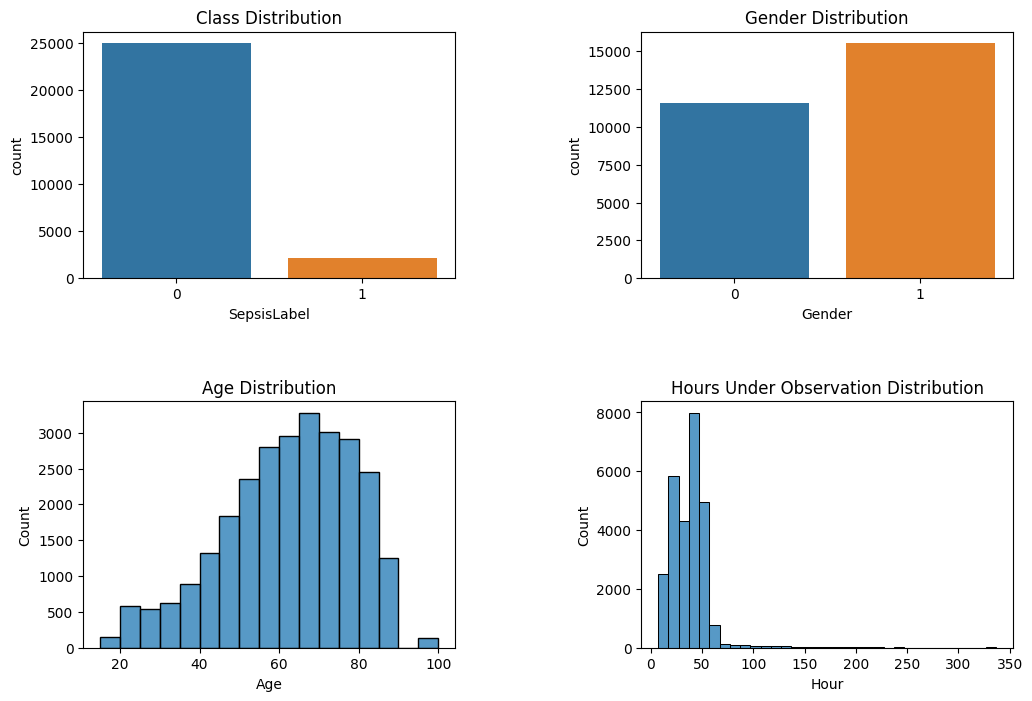

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

sns.countplot(data=unique_df, x="SepsisLabel", ax=axes[0][0])
axes[0][0].set_title("Class Distribution")

sns.countplot(data=unique_df, x="Gender", ax=axes[0][1])
axes[0][1].set_title("Gender Distribution")

sns.histplot(data=unique_df, x="Age", binwidth=5, ax=axes[1][0])
axes[1][0].set_title("Age Distribution")

sns.histplot(data=unique_df, x="Hour", binwidth=10, ax=axes[1][1])
axes[1][1].set_title("Hours Under Observation Distribution")

plt.show()

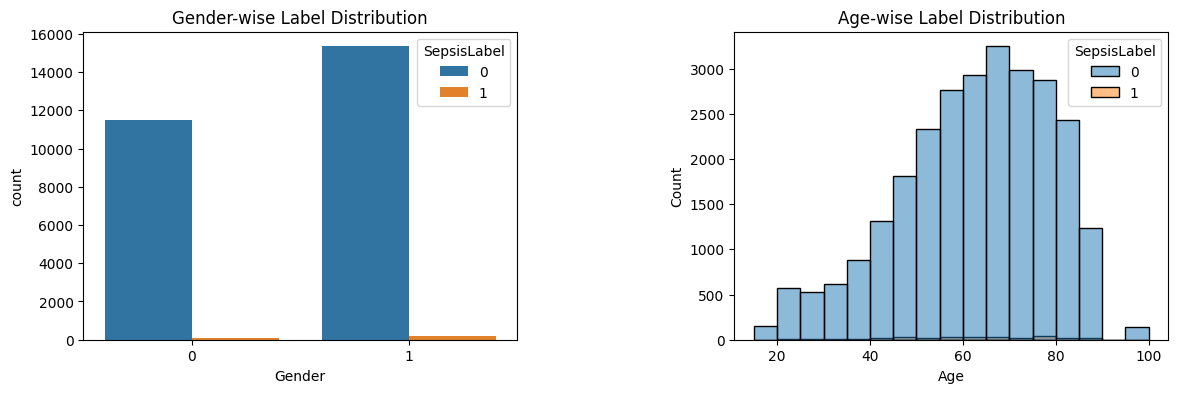

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

sns.countplot(data=unique_df, x="Gender", hue="SepsisLabel", ax=axes[0])
axes[0].set_title("Gender-wise Label Distribution")

sns.histplot(data=unique_df, x="Age", binwidth=5, hue="SepsisLabel", ax=axes[1])
axes[1].set_title("Age-wise Label Distribution")

plt.show()

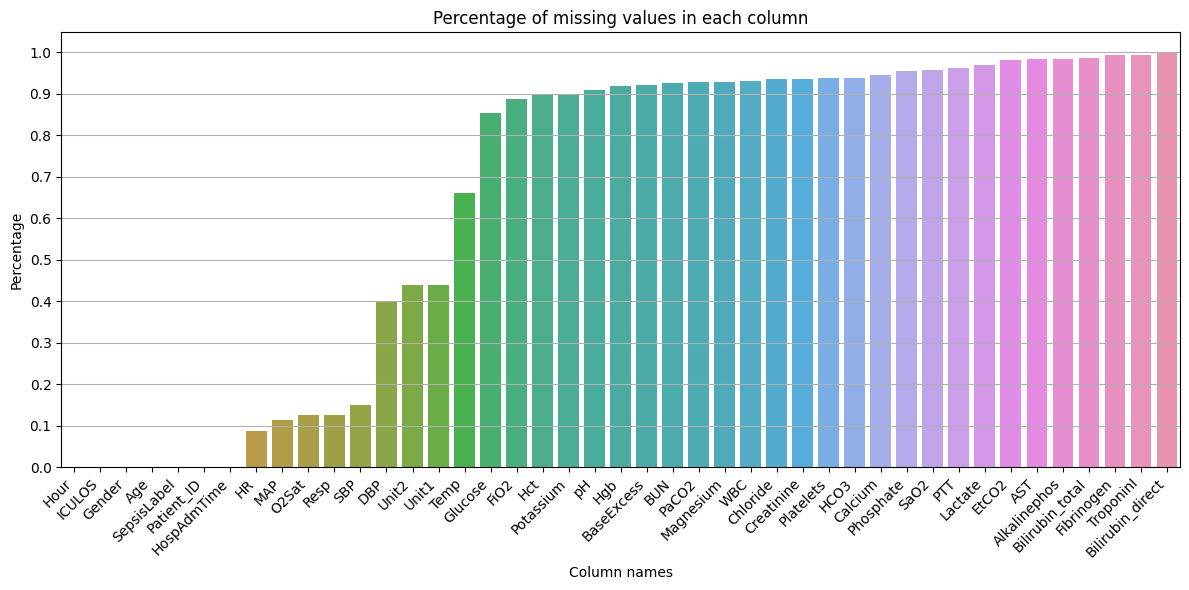

In [13]:
null_values = df.isnull().sum()/len(df)
null_values = null_values.sort_values(ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('Column names')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Remove unhelpful columns

In [14]:
df = df.drop(columns=['SBP','DBP','EtCO2','BaseExcess', 'HCO3','pH','PaCO2',
                      'Alkalinephos', 'Calcium','Magnesium', 'Phosphate',
                      'Potassium','PTT','Fibrinogen','Unit1','Unit2',
                      'Patient_ID', 'ICULOS','Bilirubin_direct','HospAdmTime'])

In [15]:
df.shape

(1048575, 23)

In [16]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'MAP', 'Resp', 'FiO2', 'SaO2', 'AST',
       'BUN', 'Chloride', 'Creatinine', 'Glucose', 'Lactate',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'Gender', 'SepsisLabel'],
      dtype='object')

### Handle Null Values

In [17]:
df.describe()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Lactate,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
count,1.048575e+06,956353.000000,916891.000000,354442.000000,929498.000000,916890.000000,118069.000000,44080.000000,16338.000000,78697.000000,...,32079.000000,14244.000000,5576.000000,108070.000000,84921.000000,72958.000000,65320.000000,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.540838e+01,84.870313,97.228627,37.003726,80.578177,18.754969,0.559317,91.820606,308.000214,24.171638,...,2.555650,2.379451,7.694817,30.728014,10.513732,11.704147,197.613414,6.253296e+01,5.691190e-01,1.984407e-02
std,2.823831e+01,17.172201,2.926971,0.776637,15.804974,5.260591,11.641050,11.708111,955.018199,20.142228,...,2.435894,4.790398,21.534539,5.150751,1.854614,7.549832,106.624153,1.625099e+01,4.951997e-01,1.394644e-01
min,0.000000e+00,20.000000,20.000000,20.900000,20.000000,1.000000,0.000000,24.000000,3.000000,1.000000,...,0.200000,0.100000,0.010000,5.500000,2.200000,0.100000,2.000000,1.500000e+01,0.000000e+00,0.000000e+00
25%,9.000000e+00,73.000000,96.000000,36.500000,69.670000,15.000000,0.400000,94.000000,25.000000,12.000000,...,1.200000,0.500000,0.050000,27.200000,9.270000,7.800000,126.000000,5.221000e+01,0.000000e+00,0.000000e+00
50%,1.900000e+01,84.000000,98.000000,37.000000,79.000000,18.000000,0.500000,97.000000,48.000000,18.000000,...,1.800000,0.900000,0.450000,30.200000,10.400000,10.600000,181.000000,6.458000e+01,1.000000e+00,0.000000e+00
75%,3.300000e+01,96.000000,99.500000,37.500000,90.000000,22.000000,0.580000,98.000000,138.000000,29.000000,...,2.900000,1.800000,5.300000,33.800000,11.600000,14.100000,245.000000,7.500000e+01,1.000000e+00,0.000000e+00
max,3.350000e+02,280.000000,100.000000,50.000000,300.000000,100.000000,4000.000000,100.000000,9890.000000,268.000000,...,31.000000,49.200000,381.600000,71.700000,32.000000,422.900000,1783.000000,1.000000e+02,1.000000e+00,1.000000e+00


In [18]:
percentage_missing = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"Percentage of missing values in the entire DataFrame: {percentage_missing:.2f}%")

Percentage of missing values in the entire DataFrame: 61.87%


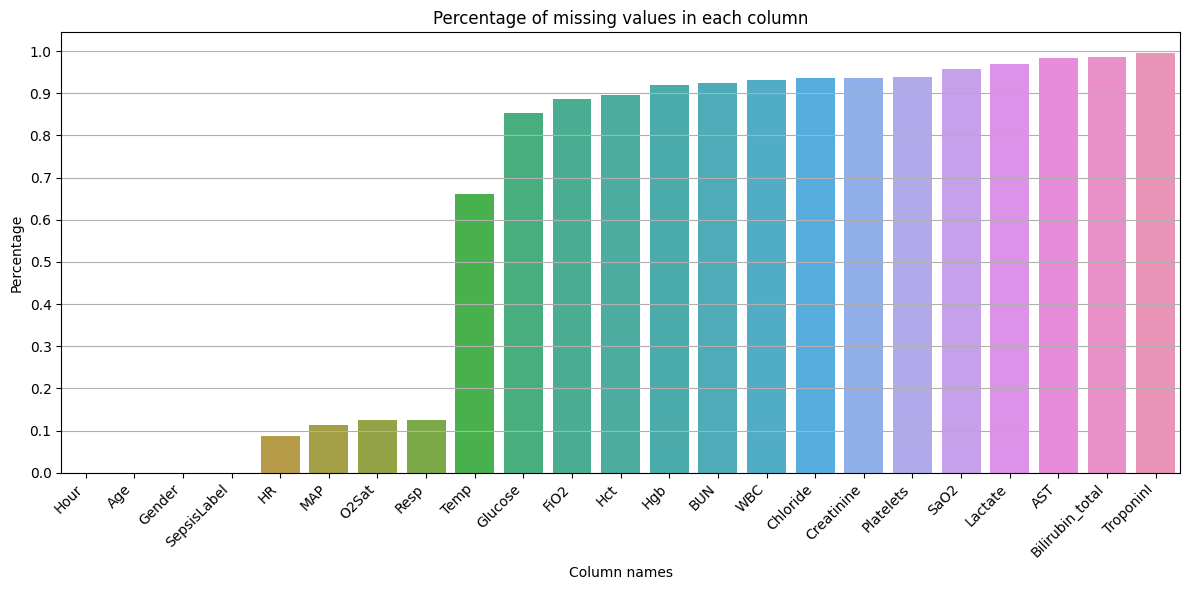

In [19]:
null_values = df.isnull().sum()/len(df)
null_values = null_values.sort_values(ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(x=null_values.index, y=null_values.values)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('Column names')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each column')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [20]:
imputer = mice.MICEData(df)
imputer.update_all(10)
imputed_df = imputer.data

In [21]:
percentage_missing = (imputed_df.isnull().sum().sum() / (imputed_df.shape[0] * imputed_df.shape[1])) * 100
print(f"Percentage of missing values in the new DataFrame: {percentage_missing:.2f}%")

Percentage of missing values in the new DataFrame: 0.00%


In [22]:
imputed_df.head()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Lactate,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
0,0,118.0,100.0,37.17,73.0,12.0,0.5,56.0,17.0,15.0,...,2.9,0.5,6.48,28.8,9.8,23.4,180.0,68.54,0,0
1,1,65.0,100.0,36.90,72.0,16.5,0.4,53.0,74.0,24.0,...,0.7,0.7,0.08,34.5,11.1,5.4,462.0,68.54,0,0
2,2,78.0,100.0,37.28,42.5,20.0,1.0,98.0,397.0,16.0,...,2.0,1.6,0.07,29.9,10.5,7.1,150.0,68.54,0,0
3,3,73.0,100.0,37.33,72.0,17.0,1.0,98.0,20.0,10.0,...,1.0,2.0,0.09,35.0,11.8,3.4,336.0,68.54,0,0
4,4,70.0,100.0,36.80,74.0,14.0,0.4,99.0,26.0,23.0,...,0.7,0.9,0.17,29.7,9.5,11.3,330.0,68.54,0,0


In [23]:
imputed_df.describe()

,Hour,HR,O2Sat,Temp,MAP,Resp,FiO2,SaO2,AST,BUN,...,Lactate,Bilirubin_total,TroponinI,Hct,Hgb,WBC,Platelets,Age,Gender,SepsisLabel
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.540838e+01,8.488639e+01,9.723079e+01,3.699102e+01,8.060415e+01,1.874797e+01,5.705963e-01,9.225654e+01,2.555163e+02,2.397204e+01,...,2.365414e+00,2.086173e+00,9.347238e+00,3.053542e+01,1.033554e+01,1.157571e+01,1.975527e+02,6.253296e+01,5.691190e-01,1.984407e-02
std,2.823831e+01,1.717980e+01,2.928962e+00,7.781110e-01,1.582806e+01,5.259648e+00,1.353111e+01,1.135067e+01,8.350920e+02,1.977367e+01,...,2.174666e+00,4.168614e+00,2.524445e+01,4.800137e+00,1.676395e+00,7.405756e+00,1.061223e+02,1.625099e+01,4.951997e-01,1.394644e-01
min,0.000000e+00,2.000000e+01,2.000000e+01,2.090000e+01,2.000000e+01,1.000000e+00,0.000000e+00,2.400000e+01,3.000000e+00,1.000000e+00,...,2.000000e-01,1.000000e-01,1.000000e-02,5.500000e+00,2.200000e+00,1.000000e-01,2.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
25%,9.000000e+00,7.300000e+01,9.600000e+01,3.650000e+01,7.000000e+01,1.500000e+01,4.000000e-01,9.400000e+01,2.400000e+01,1.200000e+01,...,1.200000e+00,5.000000e-01,5.000000e-02,2.730000e+01,9.200000e+00,7.700000e+00,1.270000e+02,5.221000e+01,0.000000e+00,0.000000e+00
50%,1.900000e+01,8.400000e+01,9.800000e+01,3.700000e+01,7.900000e+01,1.800000e+01,5.000000e-01,9.700000e+01,4.500000e+01,1.800000e+01,...,1.700000e+00,8.000000e-01,6.000000e-01,3.020000e+01,1.020000e+01,1.050000e+01,1.810000e+02,6.458000e+01,1.000000e+00,0.000000e+00
75%,3.300000e+01,9.600000e+01,9.950000e+01,3.750000e+01,9.000000e+01,2.200000e+01,5.500000e-01,9.800000e+01,1.200000e+02,2.800000e+01,...,2.700000e+00,1.700000e+00,6.850000e+00,3.340000e+01,1.130000e+01,1.400000e+01,2.450000e+02,7.500000e+01,1.000000e+00,0.000000e+00
max,3.350000e+02,2.800000e+02,1.000000e+02,5.000000e+01,3.000000e+02,1.000000e+02,4.000000e+03,1.000000e+02,9.890000e+03,2.680000e+02,...,3.100000e+01,4.920000e+01,3.816000e+02,7.170000e+01,3.200000e+01,4.229000e+02,1.783000e+03,1.000000e+02,1.000000e+00,1.000000e+00


In [24]:
imputed_df.shape

(1048575, 23)

### Export Dataset

In [25]:
imputed_df.to_csv("imputed_dataset.csv")